In [1]:
!pip install -q imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [7]:
file_path = '/content/creditcard.csv'
df = pd.read_csv(file_path)

In [8]:
df.drop(['Time'], axis=1, inplace=True)

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

X = df.drop('Class', axis=1)
y = df['Class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [15]:
from sklearn.linear_model import LogisticRegression


In [16]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)
y_pred_log = log_reg.predict(X_test)


In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

In [18]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} Evaluation ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_pred))

In [19]:
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)


--- Logistic Regression Evaluation ---
Confusion Matrix:
[[55355  1509]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9735    0.9865     56864
           1     0.0563    0.9184    0.1061        98

    accuracy                         0.9734     56962
   macro avg     0.5281    0.9459    0.5463     56962
weighted avg     0.9982    0.9734    0.9850     56962

ROC-AUC Score: 0.9459151731880147

--- Random Forest Evaluation ---
Confusion Matrix:
[[56852    12]
 [   17    81]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8710    0.8265    0.8482        98

    accuracy                         0.9995     56962
   macro avg     0.9353    0.9132    0.9240     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC-AUC Score: 0.9131597912096746


<ipython-input-20-2858e043180d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


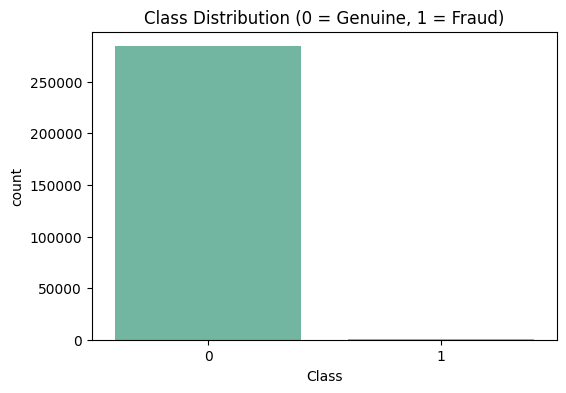

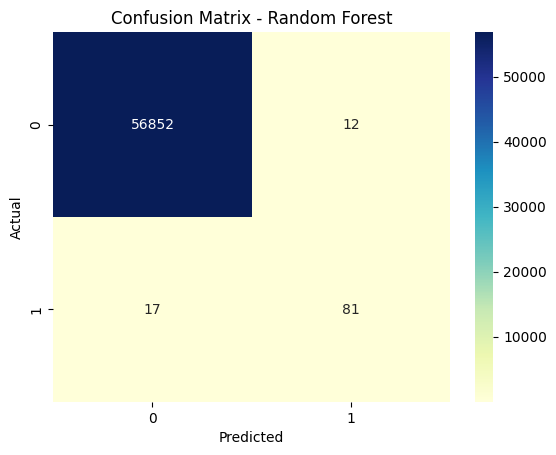

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="Set2")
plt.title("Class Distribution (0 = Genuine, 1 = Fraud)")
plt.show()

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()